**CONDUCCIÓN DE CALOR UNIDIMENSIONA (ESTADO ESTABLE)**

INTRODUCCIÓN

Este cuaderno de Jupyter pretende desarrollar el procedimiento para resolver el problema de conducción de calor unidimensional en estado estable, SIN GENERACIÓN DE CALOR, mediante el método numérico de diferencias finitas, usando Python. La formulación usada, corresponde a la propuesta por Yunus A. Cengel (Transferencia de calor y masa). La ecuación diferencial que rige el fenómeno de conducción de calor es conocida como Ley de Fourier:

\begin{equation}
\frac{\partial}{\partial x}\left(k \frac{\partial T}{\partial x}\right)+\frac{\dot{e}_{\mathrm{gen}}}{k}=\rho c \frac{\partial T}{\partial t}
\end{equation}

Para el caso de regimen estacionario sin generación de calor, la Ecuación (1) se puede expresar como:

\begin{equation*}
\frac{\partial}{\partial x}\left(k \frac{\partial T}{\partial x}\right)=0
\end{equation*}

Las aproximaciones para la primera dereivada de los puntos medios (m-1/2) y (m+1/2) de las secciones que están a uno y otro lado del nodo $m$ se puede expresar como:

\begin{equation*}
\left.\frac{d T}{d x}\right|_{m-\frac{1}{2}} \cong \frac{T_m-T_{m-1}}{\Delta x} \quad \text { y }\left.\quad \frac{d T}{d x}\right|_{m+\frac{1}{2}} \cong \frac{T_{m+1}-T_m}{\Delta x}
\end{equation*}

La aproximación para la segunda derivada en el nodo $m$ se puede expresar como:

\begin{equation*}
\left.\frac{d^2 T}{d x^2}\right|_m = \frac{T_{m-1}-2 T_m+T_{m+1}}{\Delta x^2}
\end{equation*}

Por lo tanto, la Ecuación (1) puede ser expresada en términos de sus aproximaciones de diferencias finitas como:

\begin{equation*}
\frac{T_{m-1}-2 T_m+T_{m+1}}{\Delta x^2}=0, \quad m=1,2,3, \ldots, M-1
\end{equation*}

Al hacer un sencillo tratamiento algebráico y despejar el término $T_m$ se obtiene:

\begin{equation*}
T_m=\dfrac{T_{m-1}+T_{m+1}}{2}
\end{equation*}

**CASO 1: PARED PLANA EN ESTADO ESTACIONARIO SIN GENERACIÓN DE CALOR**

Considere una pared plana en estado estacionario con propiedades termofísicas y condiciones de frontera conocidas, en este caso las temperaturas derecha e izquierda son conocidas. Se desea aproximar las temperaturas de M nodos interiores usando el método de diferencias finitas. No se considera generación de calor. A continuación se presenta la rutina de Python para resolver el problema.

INICIALIZAR

Se importan las librerías necesarias. En este caso la librería *numpy* para los cálculos relacionados con vectores y matrices, y la librería *matplotlib* para los gráficos.

In [3]:
import numpy as np  
import matplotlib.pyplot as plt

MALLA UNIDIMENSIONAL

Es necesario establecer la malla sobre la cual se calcularán las temperaturas. Esto implica conocer la longitud de la pared (dato de entrada) y el número de nodos (dato definido por el usuario).

In [4]:
L=0.5
n=50
dx=L/(n-1)
x=np.linspace(0,L,n)

CONDICIONES DE FRONTERA

Seguidamente, se establecen las condiciones de frontera. Para esto, hay que crear un vector de temperatura de una longitud de $n$ nodos, sobre el cual se impondrán las condiciones de frontera, en los extremos, y se resolverán las temperaturas de los nodos interiores por MDF.

In [7]:
T=np.array(np.zeros(n))     # Vector de temperaturas
TL=0        # Temperatura del extremo izquierdo (°C)
TR=100      # Temperatura del extremo derecho (°C)
T[0]=TL     # Se fija la condición de frontera 
T[-1]=TR    # Se fija la condición de frontera

CRITERIO DE CONVERGENCIA

El MDF (Método de diferencias finitas) debe resolverse usando métodos de solución directa o de solución iterativa. En este caso se usarán métodos iterativos (Método de Jacobi), razón por la cuál se debe establecer un error admisible al cuál llamaremos *tolerancia*, que representa el parámetro para el cual suponemos que la solución es lo suficientemente "exacta".

In [8]:
tol=0.0001      # Tolerancia admisible
error=1         # Inicializar variable "error"
iter=0          # Inicializar contador de iteraciones

SOLVER

El corazón del MDF es el solver o método de solución. Como ya fue mencionado, en este caso se usarán métodos iterativos para resolver los nodos interiores. La iteración de Jacobi, desde el punto de vista de python (o de otros lenguajes de programación) consiste de un bucle "for" anidado en un bucle "while". 

In [9]:
while error>tol:  # Mientras el error > tol, haga lo siguiente:
    Told=np.copy(T)     # Haga un vector Told que sea copia de Told
    for i in range(1, n-1):    # Para todos los nodos interiores haga esto:
        T[i]=(Told[i-1]+Told[i+1])*0.5     # Aproximación de diferencias finitas
    error=np.max(np.abs(np.array(Told-T)))
    iter=iter+1

RESULTADOS

El ordenador, por medio de las instrucciones de Python, ya ha resuelto las temperaturas interiores, y están almacenadas en la variable T, de modo que solo resta vizualizar.

In [10]:
np.set_printoptions(precision=2)
print(T)


[  0.     2.04   4.08   6.12   8.16  10.2   12.24  14.28  16.31  18.35
  20.39  22.43  24.47  26.51  28.55  30.59  32.63  34.67  36.71  38.75
  40.79  42.83  44.87  46.91  48.96  51.    53.04  55.08  57.12  59.16
  61.2   63.24  65.28  67.33  69.37  71.41  73.45  75.49  77.54  79.58
  81.62  83.66  85.7   87.75  89.79  91.83  93.87  95.92  97.96 100.  ]


GRAFICO

El último paso es crear el gráfico. Para esto, se usa la librería matplotlib.

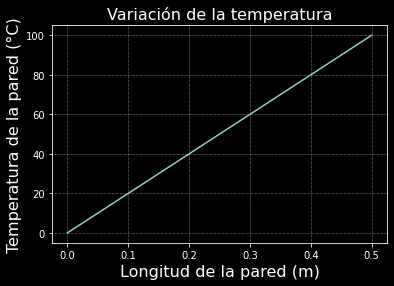

In [13]:
plt.style.use("dark_background")        # Para mostrar fondo oscuro
plt.plot(x,T)       # Grafique las temperaturas en la malla undimensional
plt.title("Variación de la temperatura", fontsize =16)
plt.xlabel("Longitud de la pared (m)", fontsize =16)
plt.ylabel("Temperatura de la pared (°C)", fontsize = 16)
plt.grid(linestyle=":", linewidth =0.5)
plt.show()
